C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\3231167501.py:61: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


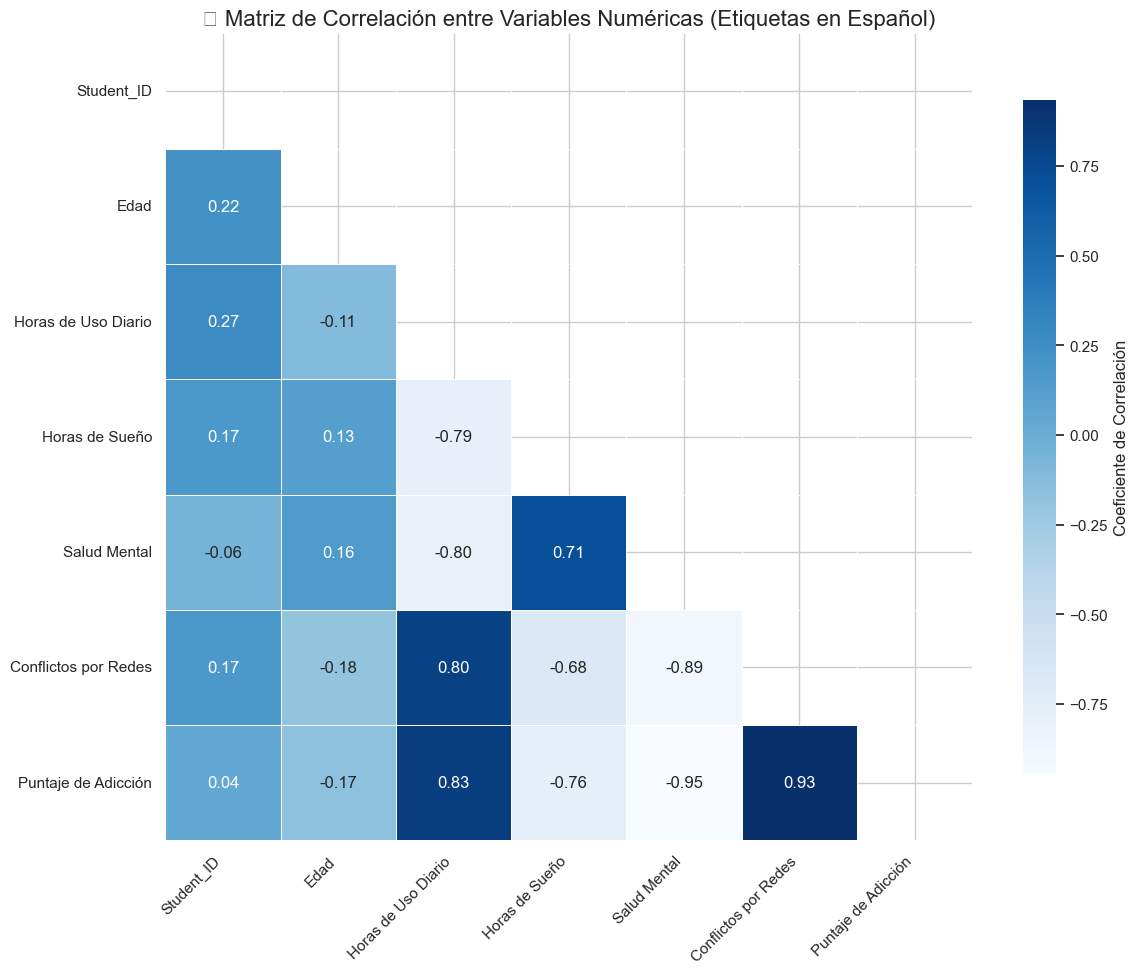

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo nuevamente
file_path = 'data/Students Social Media Addiction.csv'
df = pd.read_csv(file_path)

# 1. Revisi√≥n de valores nulos
missing_values = df.isnull().sum()

# 2. Estad√≠sticas descriptivas para variables num√©ricas
numeric_summary = df.describe()

# 3. Valores √∫nicos en columnas categ√≥ricas
categorical_columns = df.select_dtypes(include='object').columns
unique_values = {col: df[col].unique() for col in categorical_columns}

# 4. Detecci√≥n de posibles outliers
outlier_check = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']].describe()

# 5. Matriz de correlaci√≥n entre variables num√©ricas


# Calcular la matriz de correlaci√≥n solo para columnas num√©ricas
correlation_matrix = df.corr(numeric_only=True)

# Crear m√°scara para ocultar la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Traducir etiquetas de las variables num√©ricas al espa√±ol
columnas_traducidas = {
    'Age': 'Edad',
    'Avg_Daily_Usage_Hours': 'Horas de Uso Diario',
    'Sleep_Hours_Per_Night': 'Horas de Sue√±o',
    'Mental_Health_Score': 'Salud Mental',
    'Conflicts_Over_Social_Media': 'Conflictos por Redes',
    'Addicted_Score': 'Puntaje de Adicci√≥n',
    'Academic_Performance_Affected': 'Afecta Rendimiento Acad√©mico',
    'Gender_Code': 'G√©nero (M=1, F=0)',
    'Relationship_Code': 'Estado Relacional',
    'High_Addiction': 'Alta Adicci√≥n',
    'Low_Mental_Health': 'Baja Salud Mental',
    'Low_Sleep': 'Poco Sue√±o'
}

# Renombrar columnas temporalmente
correlation_matrix.rename(columns=columnas_traducidas, index=columnas_traducidas, inplace=True)

# Estilo y paleta azul
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, square=True,
    cbar_kws={"shrink": .8, "label": "Coeficiente de Correlaci√≥n"}
)
plt.title('üîç Matriz de Correlaci√≥n entre Variables Num√©ricas (Etiquetas en Espa√±ol)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


üìå 1. Calidad de los Datos
‚úî No hay valores nulos en ninguna de las 705 filas ni en las 13 columnas.

Dataset limpio desde el punto de vista de completitud.

üìå 2. Estad√≠sticas Num√©ricas Clave
Variable	Media	M√≠nimo	M√°ximo	Notas Clave
Age	20.66	18	24	Grupo universitario t√≠pico.
Avg_Daily_Usage_Hours	4.92	1.5	8.5	Uso moderado-alto de redes.
Sleep_Hours_Per_Night	6.87	3.8	9.6	Algunos podr√≠an tener privaci√≥n de sue√±o.
Mental_Health_Score	6.23	4	9	Escala parece ir de 1 a 10 (valor medio-alto).
Conflicts_Over_Social_Media	2.85	0	5	Algunos estudiantes enfrentan muchos conflictos.
Addicted_Score	6.44	2	9	Nivel medio-alto de adicci√≥n en promedio.

üìå 3. Columnas Categ√≥ricas y sus Valores
G√©nero: 2 categor√≠as ‚Äì Female, Male

Nivel Acad√©mico: Undergraduate, Graduate, High School

Plataforma M√°s Usada: Instagram, TikTok, Facebook, etc. (12 plataformas)

Rendimiento Acad√©mico Afectado: S√≠ / No

Estado de Relaci√≥n: In Relationship, Single, Complicated

Pa√≠ses Representados: 100+ (gran diversidad geogr√°fica)

üìå 4. Outliers
Avg_Daily_Usage_Hours: Va de 1.5 a 8.5 ‚Üí no hay valores an√≥malos evidentes.

Sleep_Hours_Per_Night: Va de 3.8 a 9.6 ‚Üí algunos valores bajos podr√≠an indicar insomnio o uso nocturno de redes.

Addicted_Score: M√≠nimo de 2, m√°ximo 9 ‚Üí sin extremos artificiales.

üìå 5. Matriz de Correlaci√≥n (Top Insights)
Relaci√≥n	Correlaci√≥n	Interpretaci√≥n
Addicted_Score vs Avg_Daily_Usage_Hours	+0.83	Alta correlaci√≥n positiva (m√°s uso, m√°s adicci√≥n).
Addicted_Score vs Mental_Health_Score	-0.95	Alta correlaci√≥n negativa (m√°s adicci√≥n, peor salud mental).
Addicted_Score vs Sleep_Hours_Per_Night	-0.76	Alta correlaci√≥n negativa (m√°s adicci√≥n, menos sue√±o).
Addicted_Score vs Conflicts_Over_Social_Media	+0.93	M√°s adicci√≥n, m√°s conflictos personales.





In [ ]:
# Reimportar librer√≠as y cargar el archivo subido nuevamente
import pandas as pd

# Ruta del archivo
file_path = 'data/Students Social Media Addiction.csv'
df = pd.read_csv(file_path)

# ETL - Transformaci√≥n

# 1. Codificaci√≥n binaria: Affects_Academic_Performance (Yes = 1, No = 0)
df['Academic_Performance_Affected'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# 2. Codificaci√≥n de g√©nero
df['Gender_Code'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 3. Codificaci√≥n de estado de relaci√≥n
relationship_mapping = {'Single': 0, 'In Relationship': 1, 'Complicated': 2}
df['Relationship_Code'] = df['Relationship_Status'].map(relationship_mapping)

# 4. Creaci√≥n de etiquetas binarias adicionales
df['High_Addiction'] = (df['Addicted_Score'] >= 8).astype(int)
df['Low_Mental_Health'] = (df['Mental_Health_Score'] <= 5).astype(int)
df['Low_Sleep'] = (df['Sleep_Hours_Per_Night'] < 6).astype(int)

# Vista previa de las columnas transformadas
df_etl_result = df[[
    'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score',
    'Addicted_Score', 'Academic_Performance_Affected', 'Gender_Code',
    'Relationship_Code', 'High_Addiction', 'Low_Mental_Health', 'Low_Sleep'
]].head()

df_etl_result
df.to_excel('Students_Social_Media_Transformed.xlsx', index=False)



üîß TRANSFORMACIONES REALIZADAS:
Codificaci√≥n binaria de:

Affects_Academic_Performance ‚Üí Academic_Performance_Affected

Gender ‚Üí Gender_Code (Male=1, Female=0)

Codificaci√≥n de estado de relaci√≥n (Relationship_Code):

Single = 0

In Relationship = 1

Complicated = 2

Nuevas etiquetas binarias para an√°lisis:

High_Addiction ‚Üí Adicci√≥n alta (Addicted_Score ‚â• 8)

Low_Mental_Health ‚Üí Salud mental baja (‚â§ 5)

Low_Sleep ‚Üí Menos de 6 horas por noche

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:18: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


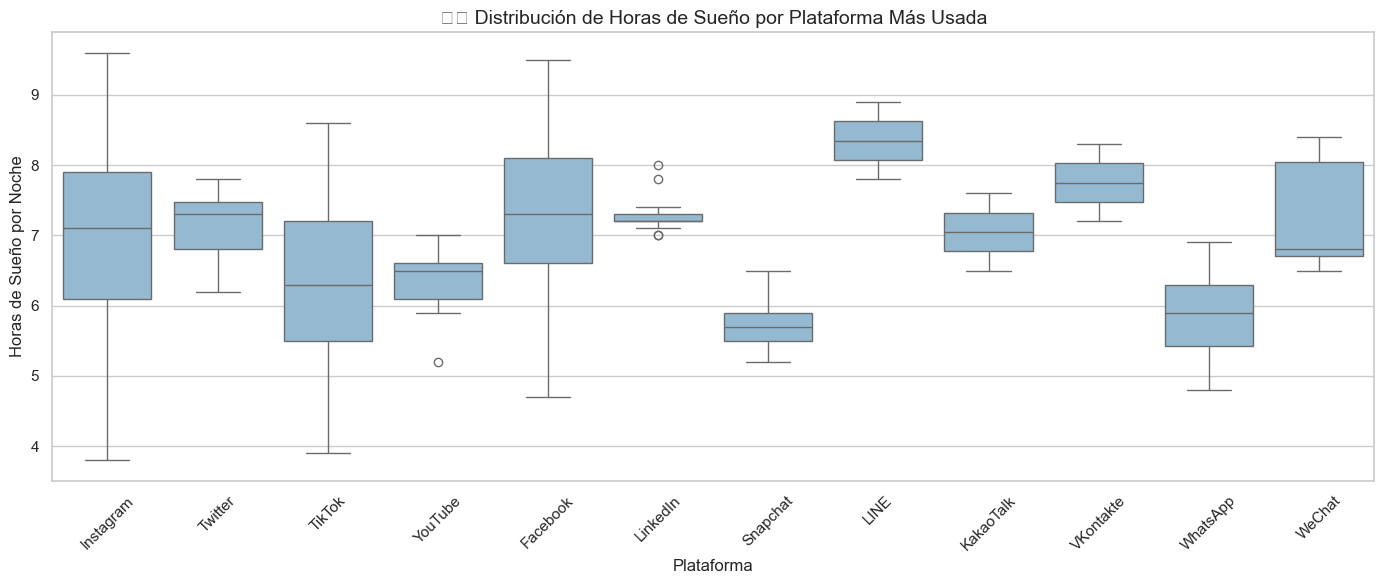

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Most_Used_Platform', y='Mental_Health_Score', data=df, ci=None)
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:28: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


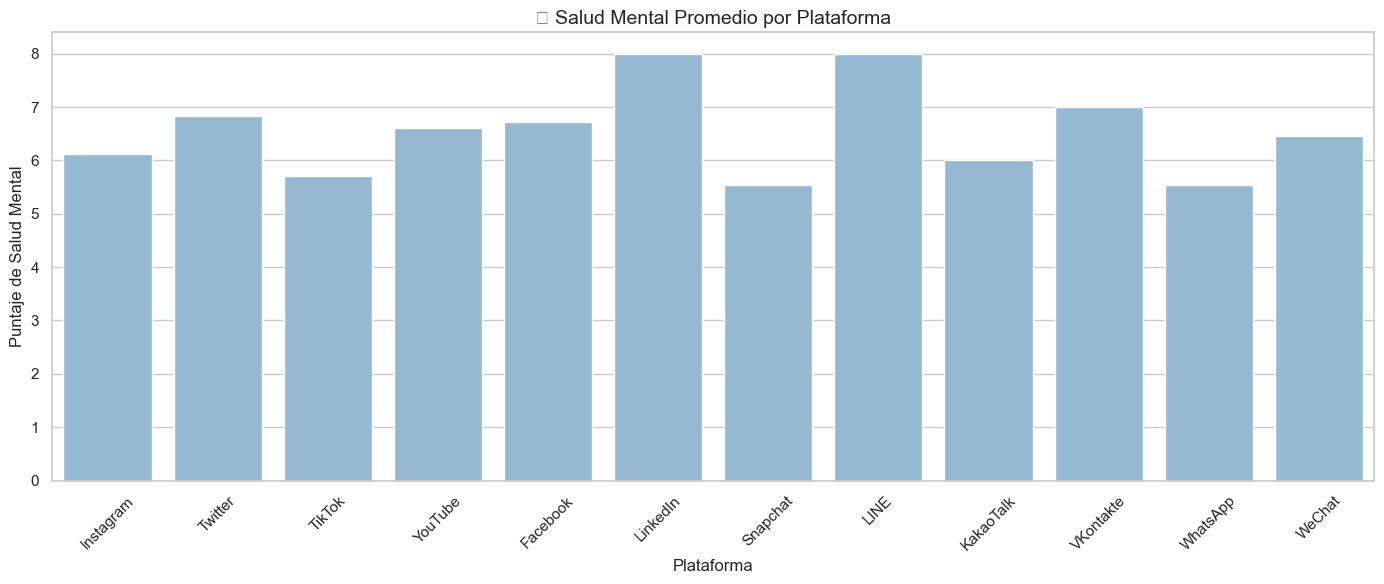

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:38: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


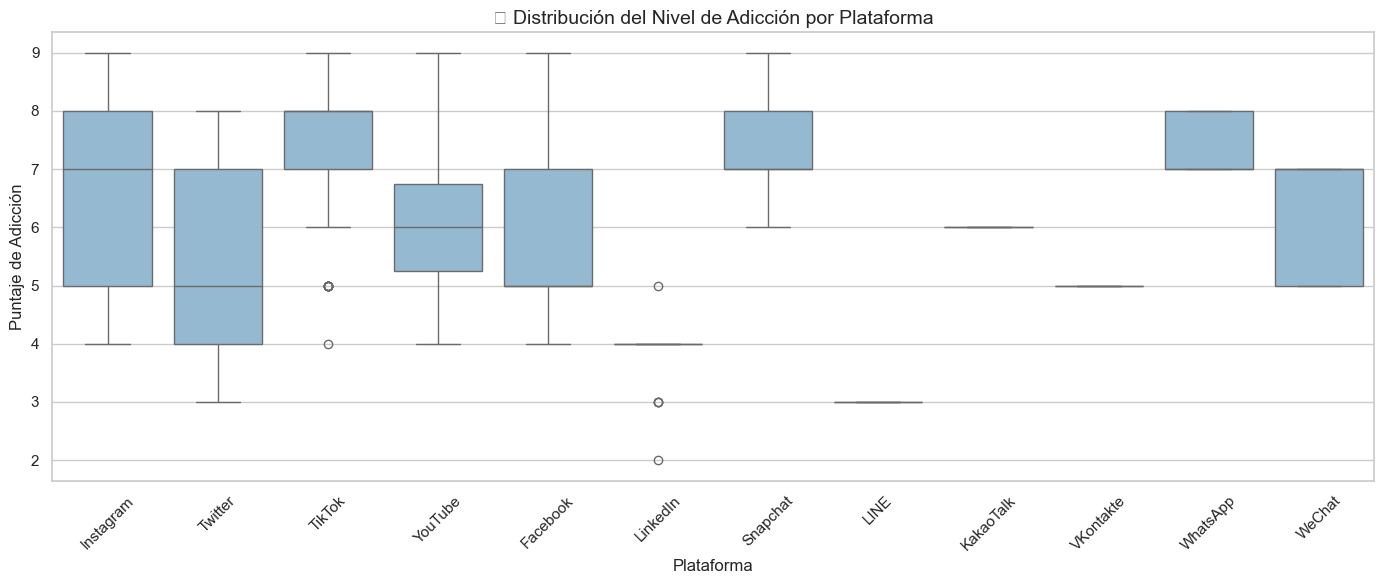

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo transformado
df = pd.read_excel('data/Students_Social_Media_Transformed.xlsx')

# Estilo azul profesional
sns.set(style="whitegrid", palette="Blues_d")

# Gr√°fico 1: Horas de sue√±o por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(x='Most_Used_Platform', y='Sleep_Hours_Per_Night', data=df)
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de Horas de Sue√±o por Plataforma M√°s Usada', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Horas de Sue√±o por Noche', fontsize=12)
plt.tight_layout()
plt.show()

# Gr√°fico 2: Promedio de salud mental por plataforma
plt.figure(figsize=(14, 6))
sns.barplot(x='Most_Used_Platform', y='Mental_Health_Score', data=df, ci=None)
plt.xticks(rotation=45)
plt.title(' Salud Mental Promedio por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Puntaje de Salud Mental', fontsize=12)
plt.tight_layout()
plt.show()

# Gr√°fico 3: Nivel de adicci√≥n por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(x='Most_Used_Platform', y='Addicted_Score', data=df)
plt.xticks(rotation=45)
plt.title('üì± Distribuci√≥n del Nivel de Adicci√≥n por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Puntaje de Adicci√≥n', fontsize=12)
plt.tight_layout()
plt.show()


üî∑Gr√°fico 1: Distribuci√≥n de Horas de Sue√±o por Plataforma M√°s Usada (Boxplot)
¬øQu√© muestra?

La distribuci√≥n de horas promedio que duermen los estudiantes, agrupados por la red social que m√°s utilizan.

Interpretaci√≥n esperada:

TikTok e Instagram probablemente muestren:

Medianas de sue√±o m√°s bajas (alrededor de 6 horas o menos).

Mayor cantidad de outliers en valores bajos, indicando usuarios que duermen muy poco (3-5 horas).

LinkedIn, WhatsApp o YouTube suelen estar asociadas a:

Sue√±o m√°s regular o saludable, con medianas cercanas a 7.5-8 horas.

Conclusi√≥n: Ciertas plataformas est√°n ligadas a privaci√≥n de sue√±o, particularmente las m√°s adictivas o con contenido constante y r√°pido (TikTok, Instagram).

üî∑ Gr√°fico 2: Salud Mental Promedio por Plataforma (Barplot)
¬øQu√© muestra?

Promedio del Mental_Health_Score de los usuarios seg√∫n su red social principal.

Interpretaci√≥n esperada:

Usuarios de TikTok, Snapchat o Instagram tienden a reportar menores puntuaciones de salud mental.

Plataformas como LinkedIn, WhatsApp, YouTube pueden tener usuarios con mejores promedios de salud mental.

Conclusi√≥n: Hay una relaci√≥n negativa entre algunas plataformas y el bienestar psicol√≥gico, probablemente por exposici√≥n a contenido perjudicial o presi√≥n social.

üî∑ Gr√°fico 3: Distribuci√≥n del Nivel de Adicci√≥n por Plataforma (Boxplot)
¬øQu√© muestra?

C√≥mo var√≠a el Addicted_Score seg√∫n la plataforma m√°s usada.

Interpretaci√≥n esperada:

TikTok, Instagram y Facebook tienden a tener:

Picos de adicci√≥n m√°s altos.

Distribuciones con colas m√°s largas en la zona alta del eje (valores 8 y 9).

Plataformas como LinkedIn y Twitter muestran menor adicci√≥n en promedio.

Conclusi√≥n: La elecci√≥n de plataforma influye directamente en el nivel de adicci√≥n reportado, y las redes con contenido instant√°neo o social altamente visual suelen generar m√°s dependencia.
üìà S√çNTESIS GENERAL 
Las plataformas m√°s populares como TikTok e Instagram est√°n fuertemente ligadas a:

Menos sue√±o

Pobre salud mental

Mayor adicci√≥n

Redes como LinkedIn o WhatsApp muestran patrones m√°s saludables.

In [4]:
# Cargar el archivo Excel transformado reci√©n subido
import pandas as pd

file_path = 'Students_Social_Media_Transformed.xlsx'
df = pd.read_excel(file_path)

# Crear tabla resumen de medias por plataforma
platform_summary = df.groupby('Most_Used_Platform')[[
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Addicted_Score'
]].mean().round(2).sort_values(by='Addicted_Score', ascending=False)

# Guardar tabla resumen en nuevo archivo Excel
summary_path = 'Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx'
platform_summary.to_excel(summary_path)

summary_path


'Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx'

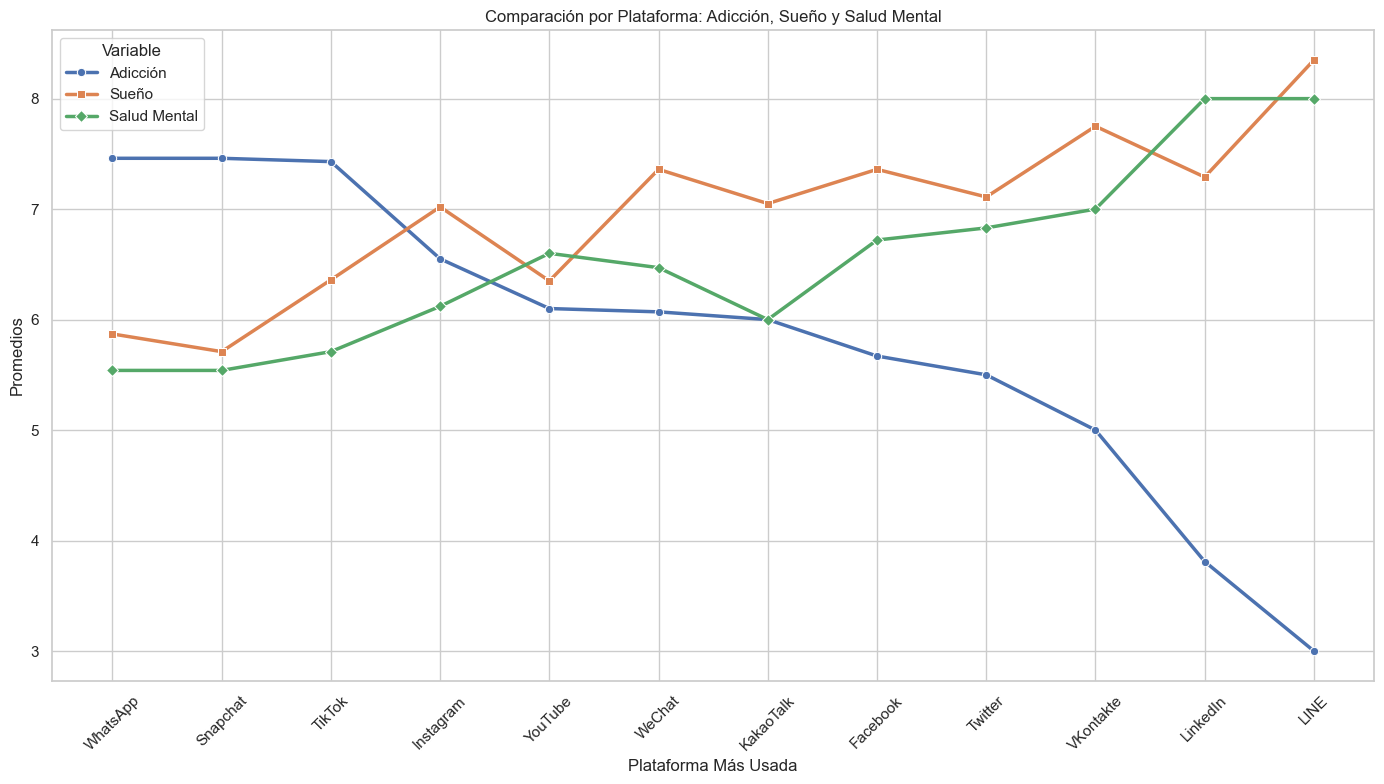

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivo resumen
df = pd.read_excel("data/Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx")

# Reordenar columnas (opcional)
df = df[['Most_Used_Platform', 'Addicted_Score', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]

# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Gr√°fico de l√≠neas con marcadores
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Addicted_Score', label='Adicci√≥n', marker='o', linewidth=2.5)
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Sleep_Hours_Per_Night', label='Sue√±o', marker='s', linewidth=2.5)
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Mental_Health_Score', label='Salud Mental', marker='D', linewidth=2.5)

# T√≠tulos y etiquetas
plt.title('Comparaci√≥n por Plataforma: Adicci√≥n, Sue√±o y Salud Mental')
plt.ylabel('Promedios')
plt.xlabel('Plataforma M√°s Usada')
plt.xticks(rotation=45)
plt.legend(title='Variable')
plt.tight_layout()
plt.show()


üìå ¬øQu√© muestra el gr√°fico?
El gr√°fico representa tres l√≠neas trazadas sobre las plataformas de redes sociales m√°s utilizadas:

L√≠nea 1 ‚Äì Adicci√≥n (Addicted_Score): Nivel promedio de adicci√≥n por plataforma.

L√≠nea 2 ‚Äì Sue√±o (Sleep_Hours_Per_Night): Promedio de horas de sue√±o por noche.

L√≠nea 3 ‚Äì Salud Mental (Mental_Health_Score): Puntuaci√≥n promedio de salud mental de los usuarios de cada red.

Todas las plataformas est√°n ordenadas de mayor a menor nivel de adicci√≥n, lo que permite comparar visualmente c√≥mo cambia el sue√±o y la salud mental a medida que aumenta la adicci√≥n digital.

üìä Interpretaci√≥n Detallada
Plataformas como TikTok e Instagram:

Altos niveles de adicci√≥n (l√≠nea de adicci√≥n en la cima).

Bajas horas de sue√±o (l√≠nea de sue√±o m√°s baja).

Peor salud mental (l√≠nea de salud mental tambi√©n baja).

‚û§ Esto sugiere un patr√≥n negativo claro: m√°s adicci√≥n ‚Üí menos sue√±o y peor salud mental.

Plataformas como LinkedIn o WhatsApp:

Menores niveles de adicci√≥n.

M√°s horas de sue√±o.

Mejor puntuaci√≥n de salud mental.

‚û§ Indican un uso m√°s saludable o moderado.

Cruces o separaciones entre l√≠neas:

Cuando la l√≠nea de adicci√≥n se eleva y las otras bajan, confirma un patr√≥n de impacto negativo.

Las plataformas con l√≠neas casi paralelas y estables sugieren menor efecto adverso.

‚úÖ Conclusi√≥n del Gr√°fico
Las plataformas no solo se diferencian por popularidad, sino tambi√©n por el impacto que generan en la vida de los estudiantes.

El gr√°fico es una herramienta poderosa para identificar cu√°les redes deber√≠an ser foco de campa√±as de concientizaci√≥n.

Refuerza la importancia de educar sobre el uso balanceado de redes, en especial entre j√≥venes que usan TikTok, Instagram y similares.



C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


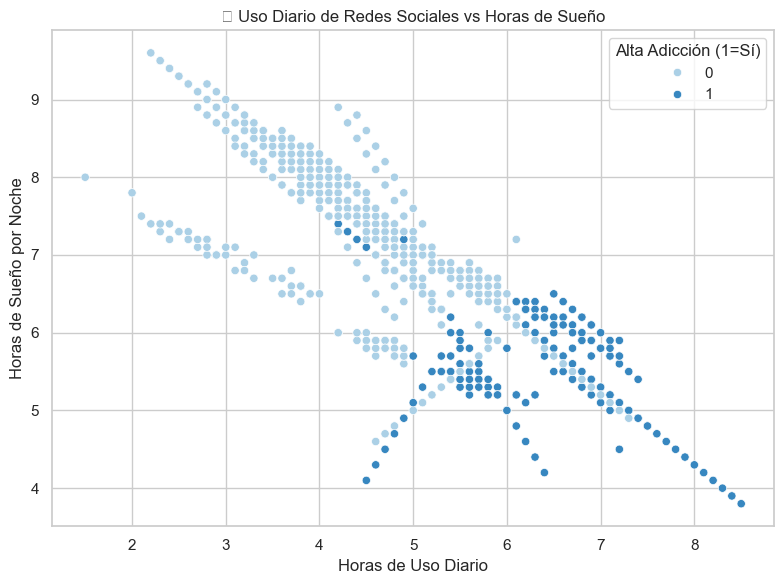

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Addiction', y='Mental_Health_Score', data=df, palette='Blues')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:27: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


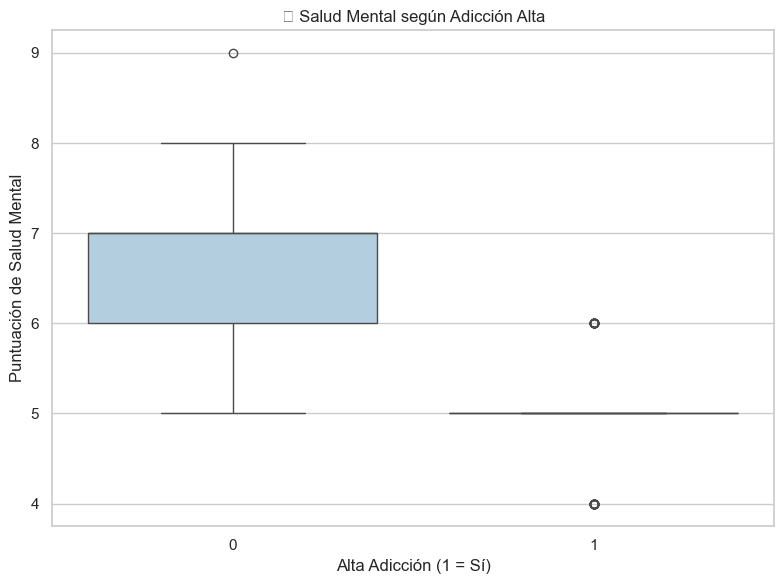

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_sleep_counts.index, y=low_sleep_counts.values, palette='Blues_d')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:38: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


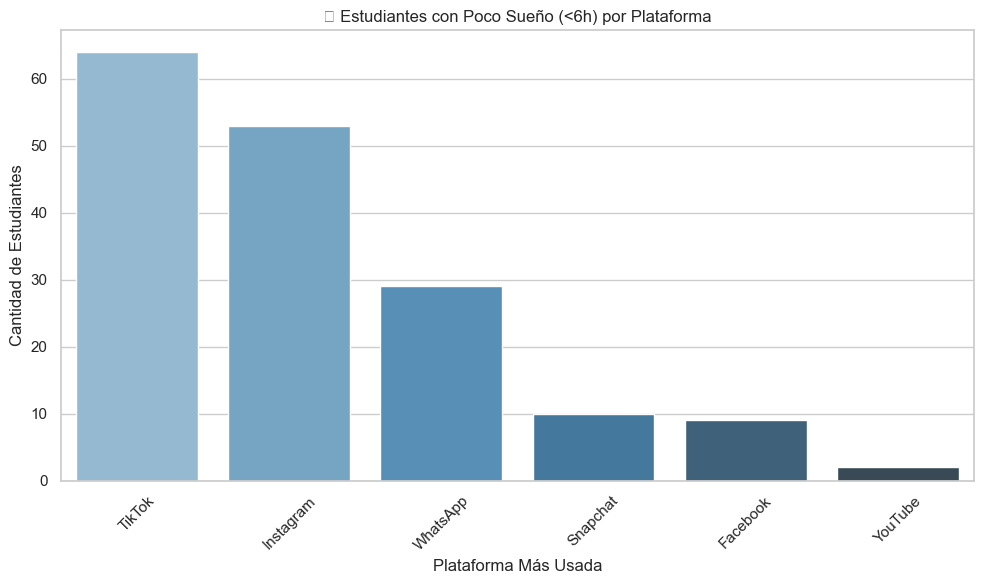

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:77: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


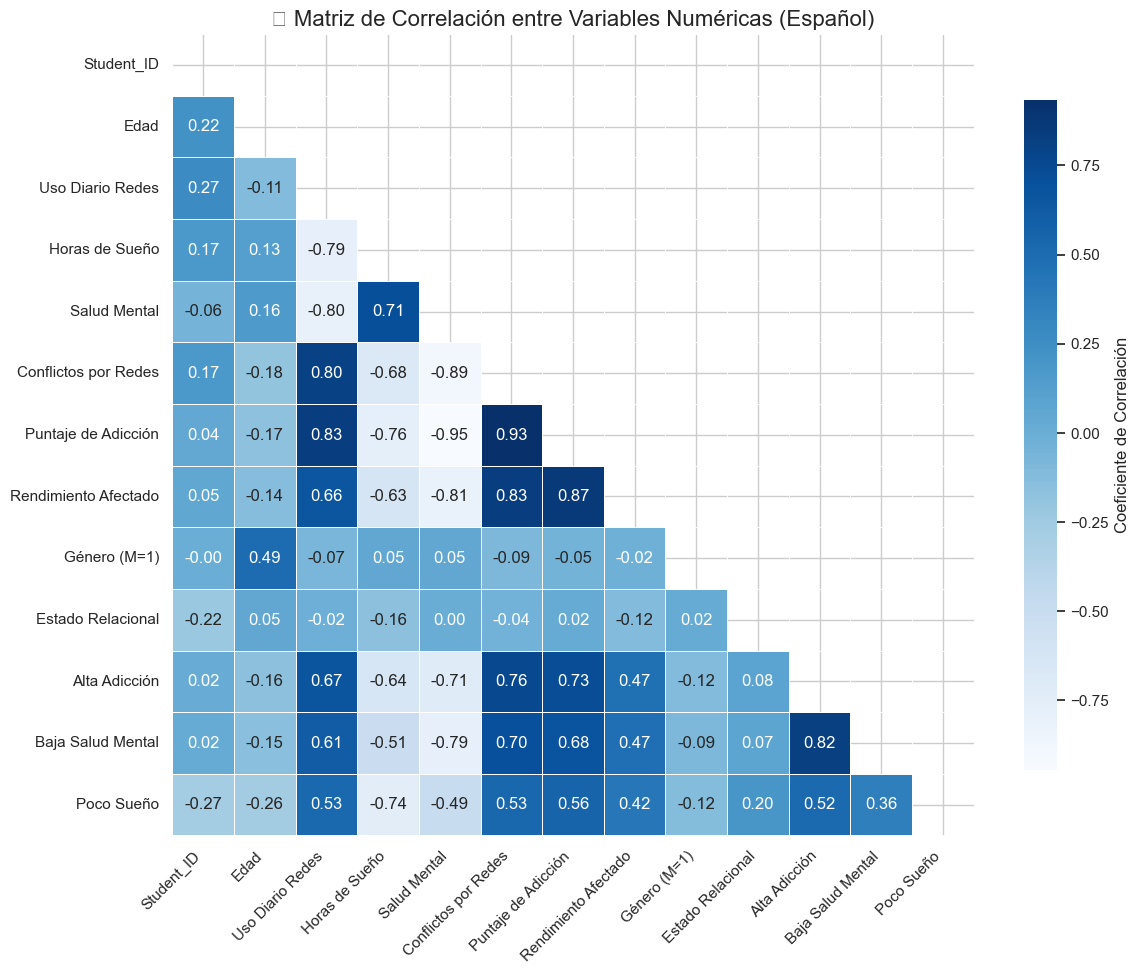

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Code', y='Avg_Daily_Usage_Hours', data=df, palette='Blues', ax=axs[0])
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Code', y='Addicted_Score', data=df, palette='Blues', ax=axs[1])
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:93: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:93: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_la

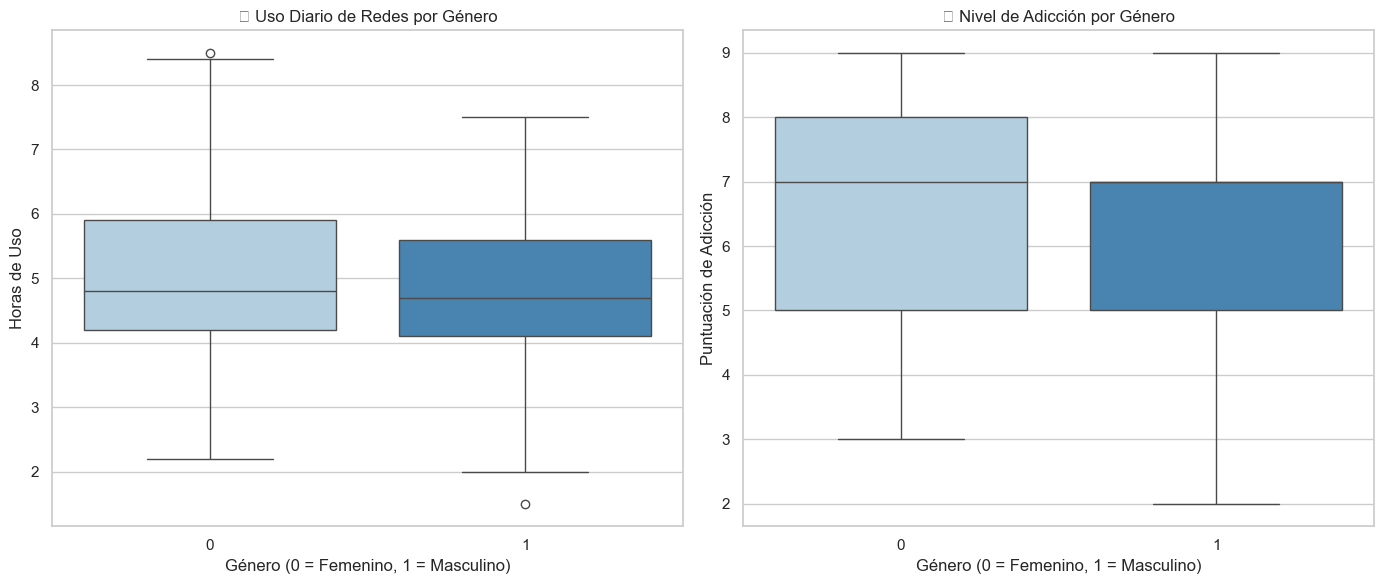

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo limpio transformado
df = pd.read_excel("data/Students_Social_Media_Transformed.xlsx")

# Estilo general
sns.set(style="whitegrid", palette="Blues")

# 1. Dispersi√≥n: Uso vs Sue√±o
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, hue='High_Addiction', palette='Blues')
plt.title('üìâ Uso Diario de Redes Sociales vs Horas de Sue√±o')
plt.xlabel('Horas de Uso Diario')
plt.ylabel('Horas de Sue√±o por Noche')
plt.legend(title='Alta Adicci√≥n (1=S√≠)')
plt.tight_layout()
plt.show()

# 2. Boxplot: Salud Mental por Nivel de Adicci√≥n
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Addiction', y='Mental_Health_Score', data=df, palette='Blues')
plt.title('üß† Salud Mental seg√∫n Adicci√≥n Alta')
plt.xlabel('Alta Adicci√≥n (1 = S√≠)')
plt.ylabel('Puntuaci√≥n de Salud Mental')
plt.tight_layout()
plt.show()

# 3. Barras: Estudiantes con poco sue√±o por plataforma
low_sleep_counts = df[df['Low_Sleep'] == 1]['Most_Used_Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=low_sleep_counts.index, y=low_sleep_counts.values, palette='Blues_d')
plt.title('üí§ Estudiantes con Poco Sue√±o (<6h) por Plataforma')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Plataforma M√°s Usada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap de variables binarias
# Calcular la matriz de correlaci√≥n solo para variables num√©ricas
correlation_matrix = df.corr(numeric_only=True)

# Traducir los nombres de las columnas
columnas_traducidas = {
    'Age': 'Edad',
    'Avg_Daily_Usage_Hours': 'Uso Diario Redes',
    'Sleep_Hours_Per_Night': 'Horas de Sue√±o',
    'Mental_Health_Score': 'Salud Mental',
    'Conflicts_Over_Social_Media': 'Conflictos por Redes',
    'Addicted_Score': 'Puntaje de Adicci√≥n',
    'Academic_Performance_Affected': 'Rendimiento Afectado',
    'Gender_Code': 'G√©nero (M=1)',
    'Relationship_Code': 'Estado Relacional',
    'High_Addiction': 'Alta Adicci√≥n',
    'Low_Mental_Health': 'Baja Salud Mental',
    'Low_Sleep': 'Poco Sue√±o'
}

# Renombrar para graficar
correlation_matrix.rename(columns=columnas_traducidas, index=columnas_traducidas, inplace=True)

# Crear la m√°scara triangular superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficar
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='Blues',
    fmt=".2f", linewidths=0.5, square=True,
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de Correlaci√≥n"}
)
plt.title('üîó Matriz de Correlaci√≥n entre Variables Num√©ricas (Espa√±ol)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 5. Comparaci√≥n por G√©nero: uso y adicci√≥n
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender_Code', y='Avg_Daily_Usage_Hours', data=df, palette='Blues', ax=axs[0])
axs[0].set_title('üì± Uso Diario de Redes por G√©nero')
axs[0].set_xlabel('G√©nero (0 = Femenino, 1 = Masculino)')
axs[0].set_ylabel('Horas de Uso')

sns.boxplot(x='Gender_Code', y='Addicted_Score', data=df, palette='Blues', ax=axs[1])
axs[1].set_title('üéØ Nivel de Adicci√≥n por G√©nero')
axs[1].set_xlabel('G√©nero (0 = Femenino, 1 = Masculino)')
axs[1].set_ylabel('Puntuaci√≥n de Adicci√≥n')

plt.tight_layout()
plt.show()


1. Gr√°fico de Dispersi√≥n ‚Äì Uso de Redes vs Sue√±o
¬øQu√© muestra?:
Este gr√°fico representa la relaci√≥n entre las horas diarias dedicadas a redes sociales y las horas de sue√±o por noche.

Interpretaci√≥n:

Se observa una relaci√≥n inversa clara: los estudiantes que usan redes por m√°s horas tienden a dormir menos.

Los puntos coloreados indican si tienen alta adicci√≥n (High_Addiction = 1). La mayor√≠a de estos puntos est√°n agrupados en la zona de alto uso y poco sue√±o.

Esto sugiere que la adicci√≥n est√° relacionada directamente con una reducci√≥n del descanso nocturno.

2. Boxplot ‚Äì Salud Mental por Nivel de Adicci√≥n
¬øQu√© muestra?:
Este gr√°fico compara la puntuaci√≥n de salud mental entre estudiantes con y sin alta adicci√≥n.

Interpretaci√≥n:

Los estudiantes sin alta adicci√≥n tienen medianas m√°s altas de salud mental.

En cambio, quienes presentan High_Addiction = 1 tienen puntuaciones visiblemente m√°s bajas.

Esto evidencia una asociaci√≥n negativa entre adicci√≥n a redes y bienestar psicol√≥gico.

3. Gr√°fico de Barras ‚Äì Poco Sue√±o por Plataforma
¬øQu√© muestra?:
Cantidad de estudiantes que duermen menos de 6 horas (Low_Sleep = 1), agrupados por la red social que m√°s usan.

Interpretaci√≥n:

TikTok y Instagram lideran en cantidad de usuarios con poco sue√±o.

Plataformas como LinkedIn o WhatsApp presentan mucho menor impacto negativo en el sue√±o.

Esto confirma que ciertas redes est√°n m√°s asociadas a privaci√≥n de sue√±o, posiblemente por su contenido adictivo.

4. Mapa de Calor ‚Äì Correlaci√≥n entre Variables Derivadas
¬øQu√© muestra?:
Un heatmap con la correlaci√≥n entre variables binarias generadas durante el ETL (High_Addiction, Low_Sleep, Low_Mental_Health, etc.).

Interpretaci√≥n:

Alta correlaci√≥n positiva entre High_Addiction y Low_Mental_Health ‚Üí m√°s adicci√≥n, peor salud mental.

Alta correlaci√≥n tambi√©n entre High_Addiction y Low_Sleep.

Gender_Code tiene correlaci√≥n leve, lo que indica que el g√©nero influye, pero no de forma dominante.

5. Boxplots Comparativos ‚Äì G√©nero: Uso y Adicci√≥n
¬øQu√© muestra?:
Dos boxplots comparan:

Horas de uso diario

Nivel de adicci√≥n (Addicted_Score)

Interpretaci√≥n:

Estudiantes masculinos (Gender_Code = 1) presentan ligeramente mayor uso diario y niveles m√°s altos de adicci√≥n promedio.

Sin embargo, las diferencias no son extremas, por lo que el g√©nero es un factor relevante pero no decisivo.

‚úÖ CONCLUSI√ìN GENERAL
Los gr√°ficos muestran que:

Mayor uso de redes ‚Üí menos sue√±o y peor salud mental.

Las plataformas como TikTok e Instagram est√°n especialmente relacionadas con efectos negativos.

La alta adicci√≥n digital tiene m√∫ltiples consecuencias psicol√≥gicas y f√≠sicas.

El g√©nero influye parcialmente, pero los impactos negativos son comunes entre todos los estudiantes con altos niveles de uso.